# **SEÑALES ELÉCTRICAS**

# Tema 9

**OBJETIVO**: Experimentar con el concepto de fase lineal. Comparar un par de filtros llamados "de fase lineal". Practicar con la síntesis de señal mediante convolución y la FFT inversa.

# Ejercicio 2


 Se sabe que un filtro pasa bajos ideal no es realizable ya que su respuesta al impulso resulta NO causal. Una manera de lograr un filtro aproximado al ideal es tomar una respuesta impulsiva recortada con respecto a la original y "retrasarla" para respetar la condición de causalidad. La fase del filtro resulta lineal con respecto a la frecuencia.

> a) Se quiere tener un filtro pasa-bajos con ancho de banda AB=1Hz, y amplitud unitaria. Para esto se quiere conservar el lóbulo principal y los primeros lóbulos laterales de la respuesta al impulso del filtro ideal, con lo que se conservar el 95% de la energía de la respuesta impulsiva. ¿Cuanto será el retardo de tiempo introducido por el filtro aproximado?


## Apartado a

La respuesta en el tiempo para este filtro ideal, con zona de paso
en $f=[-1;1]$ y amplitud unitaria $A=1$ en la frecuencia, se tendría:

- frecuencia:
  
  $\tau=2 [Hz]$,
  
- Por lo tanto, el argumento de la senocardinal $= \tau*\pi*t=2\pi*t$;

Entonces, en el tiempo queda:

$h(t)= A\tau sinc(\tau*\pi*t)= 2*sinc(2\pi*t)$

Para este caso, los ceros en el tiempo estarían idealmente en $ \pm \frac{k}{\tau}=\pm 0.5k$, con k real.

Su energía será $ = A^2*\tau=1^2*2=2$


In [1]:
import numpy as np
from math import ceil
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq, fftshift, ifft

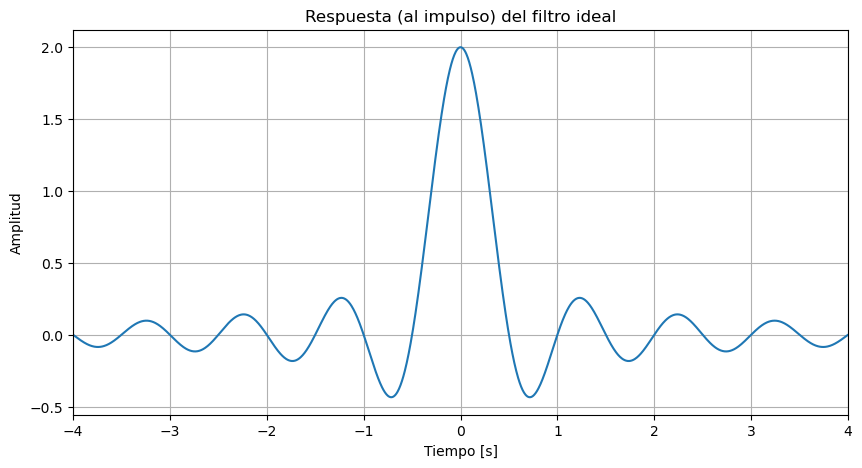

In [2]:
# Respuesta (al impulso) del filtro ideal que nos interesa

pasot=0.005
eje_tiempo=np.arange(-4, 4, pasot, dtype=float)

fig = plt.gcf()
fig.set_size_inches(10, 5)

plt.title("Respuesta (al impulso) del filtro ideal")

plt.plot(eje_tiempo,2*np.sinc(2*eje_tiempo))
plt.xlim([-4, 4])

plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")

plt.grid()
plt.show()

In [3]:
 # Energía que queda en la señal de salida.
 # (La energía en la banda [-1 a 1] Hz y Amplitud 1, es igual a 2)
energia_restante = 0.95*2

energia_acumulada = 0  # Variable auxiliar del lazo while, para acumular la energía de la onda.
delta_tiempo_1 = 0.001  # Paso de tiempo para calcular la energía.

aux_ener=energia_restante/delta_tiempo_1
index=0
while energia_acumulada < aux_ener:
    incremento_energia = 2*(2*np.sinc(2*index*delta_tiempo_1))**2
    energia_acumulada = energia_acumulada + incremento_energia
    index=index+1

In [4]:
print(f"El índice donde se llega con la cantidad de energía indicada es el {index}")

El índice donde se llega con la cantidad de energía indicada es el 891


In [5]:
# Para verificar el cálculo
print(f"La energía acumulada hasta el índice {index} es {energia_acumulada*delta_tiempo_1:.3f}")

La energía acumulada hasta el índice 891 es 1.900


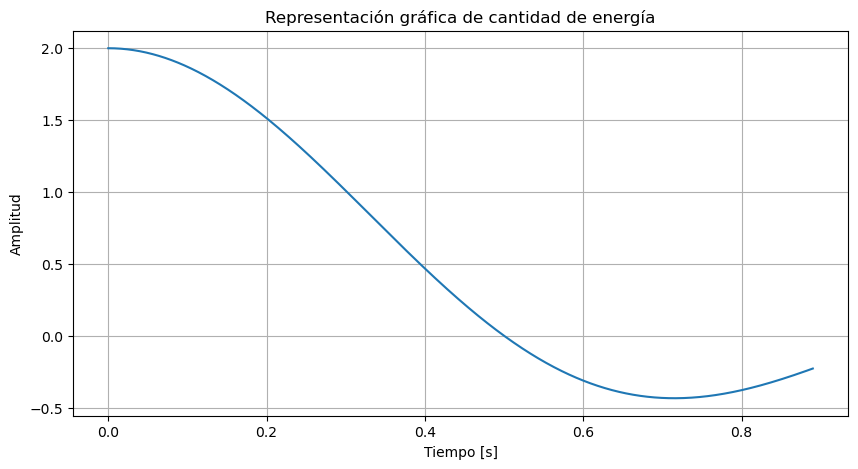

In [6]:
fig = plt.gcf()
fig.set_size_inches(10, 5)

plt.title("Representación gráfica de cantidad de energía")

plt.plot(
    np.arange(0, index, 1, dtype=int)*delta_tiempo_1,
    2*(np.sinc(2*np.arange(0, index, 1, dtype=int)*delta_tiempo_1))
)

plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")

plt.grid()
plt.show()

La gráfica muestra que para considerar el $95%$ de la energía basta usar el lóbulo central y los 2 laterales de la seno cardinal.

**Nota**: En el caso de usar el 99%, hace falta considerar hasta los séptimos lóbulos laterales.

Para el 95%: como los ceros se producen en $\pm k*0.5\ [s]$, hay que llegar hasta $k=2$, los ceros del filtro estarán en $t=-1$ y $t=1segs$;

La respuesta temporal CAUSAL será:


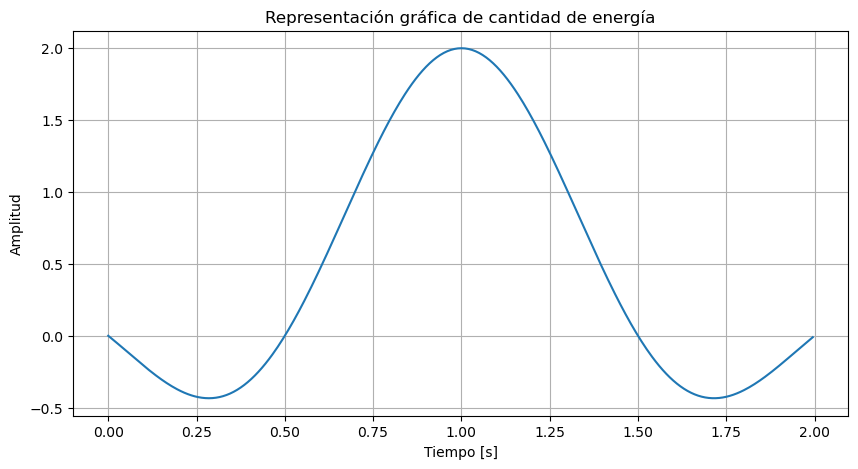

In [7]:
# Dibujo la respuesta al impulso del filtro aproximado
f_samp=1/pasot
duracion=2
eje_tiempo_flin=np.arange(0,duracion,pasot,dtype=float)  # En este caso la duración de la respuesta es de 2 segundos
ht=2*np.sinc(2*(eje_tiempo_flin-.5*duracion))
#ht=2*np.sinc(2*(eje_tiempo_flin))
fig = plt.gcf()
fig.set_size_inches(10, 5)

plt.title("Representación gráfica de cantidad de energía")

plt.plot(eje_tiempo_flin,ht)

#plt.xlim([0, 2])

plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")

plt.grid()
plt.show()

## Apartado b

**Cálculo de la respuesta en frecuencia del filtro aproximado**

Para poder calcular aproximadamente los coeficientes del filtro con la FFT,procedo a agregarle a la respuesta temporal un grupo de ceros; 9 veces la duración del pulso base, llegando a un tiempo total de $T=20=10*2\ segs$; por esto, la resolución de frecuencia es de $\frac{1}{20}$


In [8]:
N1=len(eje_tiempo_flin)
N2=10*N1
T=N2*pasot
res_frec=1/T
ht_largo= np.pad(ht,(0, 9*N1))   # Respuesta en el tiempo de nuestro filtro aproximado de fase lineal.


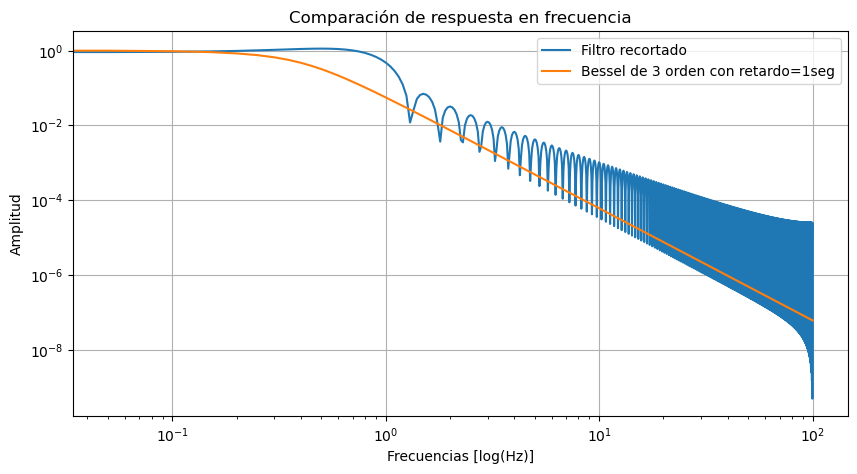

In [9]:
# Se divide en N2 para el normalizado en amplitud de la respuesta, ya que la instrucción "FFT"
# no realiza tal división. Se multiplica por el Tiempo total de la muestra, para obtener el espectro
# de energía,(y no el de potencia, que es el calculado por defecto por la FFT).

espect= T*fft(ht_largo)/N2
ht_largo_shifted=fftshift(espect)


fig = plt.gcf()
fig.set_size_inches(10, 5)

plt.title("Comparación de respuesta en frecuencia")

# Se dibuja la respuesta en frecuencia aproximada del filtro recortado.
ejefrec=(np.arange(0, N2, 1, dtype=int) - .5 *N2)*res_frec
plt.loglog(ejefrec,abs(ht_largo_shifted))

# Filtro de Bessel de 3 orden con retardo=1seg
# H(s)=15/(s^3+6s^2+15s+15), resulta
# H(w)=15/(j(15w-w^3)+15-6w^2)
# H(f)=15/(j(95,2f-248f^3)+15-237f^2)

HB=15./(1j * (95.2 * ejefrec - 248 * ejefrec ** 3) + 15 - 237*ejefrec ** 2)
plt.loglog(ejefrec,abs(HB))

plt.xlabel("Frecuencias [log(Hz)]")
plt.ylabel("Amplitud")
plt.legend(["Filtro recortado", "Bessel de 3 orden con retardo=1seg"])

plt.grid()
plt.show()

## Apartado c

Usando la FFT inversa encuentre la respuesta al impulso del filtro de Bessel, y compárela con la del filtro PB ideal aproximado.

¿Cuál de las 2 respuestas le parece a Ud. que representa mejor un elemento con transmisión sin distorsión?


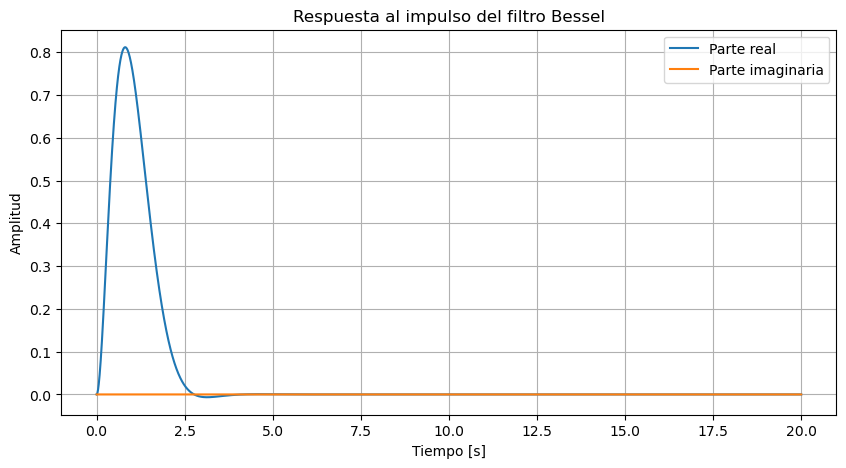

In [10]:
# Hb es la respuesta en frecuencia del filtro de Bessel, Es la Tdf de la
# respuesta al impulso. Si Hb se ingresa como argumento a la ifft, esta
# considera que se trata de un espectro de líneas de una señal períodica,
# por lo que es necesario multiplicarla por el tiempo de la muestra, para
# ajustar la escala de los numeros de salida. No es necesario dividir en
# 10*N1, ya que la ifft hace esa división por defecto.
# Respuesta al impulso del filtro de Bessel

HBshift=fftshift(HB)  # % Se acomoda la respuesta en frecuencia para darla de argumento a la ifft.
hB=N2*(ifft(HBshift))/T # hB: Respuesta en el tiempo del filtro de Bessel.
                        # El factor "N2" es porque la ifft considera que el
                        # espectro a antitransformar es N2 veces mayor; y
                        # también que se trata del espectro de una señal
                        # periódica por lo que hay que dividirlo en T;
eje_tiempo4=np.arange(0, N2, 1, dtype=int)*pasot

fig = plt.gcf()
fig.set_size_inches(10, 5)

plt.title("Respuesta al impulso del filtro Bessel")

plt.plot(eje_tiempo4,np.real(hB))
plt.plot(eje_tiempo4,np.imag(hB))

plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.legend(["Parte real", "Parte imaginaria"])

plt.grid()
plt.show()

d) Mediante convolución en el tiempo, encuentre la respuesta al escalón de los dos filtros. Verifique si los valores de estado estacionario coinciden con los esperado a partir de los  módulos de las respuestas en frecuencia correspondientes.

Indique cómo se manifiesta (o dónde es medible) el retardo de tiempo teórico en las formas de onda de salida.

(Resulta interesante observar cómo cambia la respuesta al escalón, al ir adoptando aproximaciones al filtro ideal que consideren más lóbulos de la respuesta al impulso).

¿Cuál filtro diría que reproduce mejor la forma de la señal de entrada?


d:\Programas\RadioConda\Lib\site-packages\matplotlib\cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
d:\Programas\RadioConda\Lib\site-packages\matplotlib\cbook.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


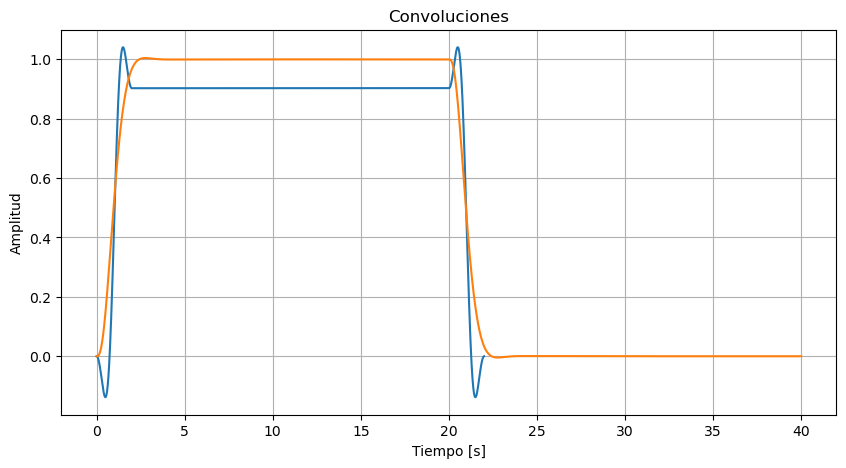

In [11]:
# Convoluciones
# Filtro aproximado convolucionado con un escalón unitario
# step_ht=pasot3*convol(ht,ones(1,4000));

step_ht = pasot * np.convolve(ht,np.ones(4000))

fig = plt.gcf()
fig.set_size_inches(10, 5)

plt.title("Convoluciones")

plt.plot(np.arange(0,np.size(step_ht),1,dtype=int) * pasot,step_ht)

# filtro de Bessel:
#Bess = np.real(hB(1,1000))
step_Bess=pasot * np.convolve(hB,np.ones(4000))

plt.plot(np.arange(0,np.size(step_Bess),1,dtype=int)*pasot,step_Bess)

plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")

plt.grid()
plt.show()

# Tema 10   

**OBJETIVO**: Practicar con los conceptos de ancho de banda equivalente y productos de intermodulación. Ganar destreza en el uso de potencias expresadas en escalas logaritmicas.


In [12]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.fft import fft, fftfreq, fftshift

## Ejercicio 1

Encuentre el ancho de banda de ruido equivalente para un filtro pasabajos de primer orden y para uno de segundo orden (por ejemplo, pueden ser de tipo Butterworth), tomando como unidad de referencia la frecuencia de corte de 3dB.


$AB_{eq} = \frac{1}{|H_{(f)max}|^{2}}\int_{0}^{∞}{|H_{(f)}|^{2}.df}$


---

Datos Auxiliares:

- Función de FPB de 1° orden: 1/(S+1), corte en ω=1
- Función de FPB de 2° orden: 1/(S^2+1.41S+1), corte en ω=1



### Variable generales

In [13]:
# Defino el vector de frecuencia que será compartido para todos los casos
frecuencia_de_corte = 1
delta_w = 0.005

min_frec = 0
max_frec = 500
eje_de_frecuencia_vector = np.arange(start=min_frec, stop=max_frec, step=delta_w)  # angular

### FPB de 1° orden

In [14]:
# Defino función transferencia del filtro

funcion_transferencia_1er_orden = lambda w: 1/(1j * w + 1)

In [15]:
# Utilizo la función transferencia definida anteriormente
respuesta_frecuencia_1er_orden = funcion_transferencia_1er_orden(eje_de_frecuencia_vector)

# Calculo módulo de la función transferencia
respuesta_frecuencia_1er_orden_module = abs(respuesta_frecuencia_1er_orden)

# Encuentro máximo y mínimo de la respuesta en frecuencia de 1er orden
max_module_1er_orden = respuesta_frecuencia_1er_orden_module.max()
min_module_1er_orden = respuesta_frecuencia_1er_orden_module.min()

### FPB de 2° orden

In [16]:
# Defino función transferencia del filtro

funcion_transferencia_2do_orden = lambda w: 1/((1j * w)**2 + 1.41 * 1j* w + 1)

In [17]:
# Utilizo la función transferencia definida anteriormente
respuesta_frecuencia_2do_orden = funcion_transferencia_2do_orden(eje_de_frecuencia_vector)

# Calculo módulo de la función transferencia
respuesta_frecuencia_2do_orden_module = abs(respuesta_frecuencia_2do_orden)

# Encuentro máximo y mínimo de la respuesta en frecuencia de 2do orden
max_module_2do_orden = respuesta_frecuencia_2do_orden_module.max()
min_module_2do_orden = respuesta_frecuencia_2do_orden_module.min()

### Comparación

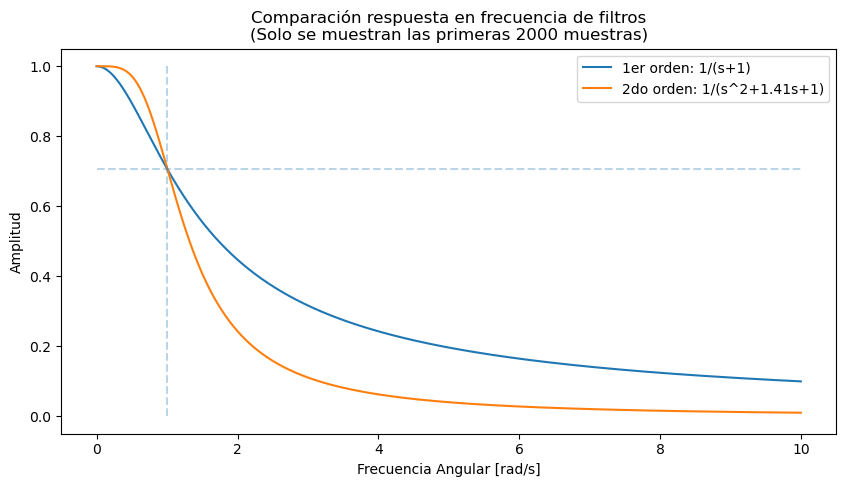

In [18]:
# Grafico ambas respuestas para poder compararlas

fig = plt.gcf()
fig.set_size_inches(10, 5)

plt.title(
  "Comparación respuesta en frecuencia de filtros\n"
  "(Solo se muestran las primeras 2000 muestras)"
)

# Solo tomo las primeras 2000 muestras (valor arbitrario) para poder observar
# correctamente las curvas. Si tomo todas las muestras veré las gráficas sin mucho
# detalle debido a la cantidad de muestras que presenta el vector
plt.plot(
  eje_de_frecuencia_vector[:2000],
  respuesta_frecuencia_1er_orden_module[:2000]
)
plt.plot(
  eje_de_frecuencia_vector[:2000],
  respuesta_frecuencia_2do_orden_module[:2000]
)

# Grafico recta en frecuencia de corte para evaluar punto de -3 dB de potencia
plt.vlines(
    x=frecuencia_de_corte,
    ymin=min(min_module_1er_orden, min_module_2do_orden),
    ymax=max(max_module_1er_orden, max_module_2do_orden),
    alpha=0.3,
    linestyles='--'
)

# Grafico recta en amplitud teórica del punto de -3 dB de potencia

# Complete con el valor teórico de tensión para el punto de -3 dB de potencia
plt.hlines(y=1/np.sqrt(2), xmin=min_frec, xmax=10, alpha=0.3, linestyles='--')

plt.legend(["1er orden: 1/(s+1)", "2do orden: 1/(s^2+1.41s+1)"])
plt.xlabel("Frecuencia Angular [rad/s]")
plt.ylabel("Amplitud")

plt.show()

### Ancho de Banda de Ruido Equivalente

Leer en página 419 "Noise Equivalent Bandwidth" en "Communication Systems. An Introduction to Signal and Noise in Electrical Communications (2009). A. Bruce Carlson, Paul B. Crilly. 5th Edition. McGraw-Hill Higher Education"

Definición: El ancho de banda de ruido equivalente (ENBW) se define como el ancho de banda de un filtro ideal que produce la misma potencia de ruido que la de un filtro real. También se denomina ancho de banda de ruido o ancho de banda de ruido efectivo.

**Fórmula**

$AB_{eq} = \int_{0}^{∞}|\frac{H(jw)}{H_{max}}|^2.dw$

Cómo $|H_{max}|^2$ es una constante puedo sacarla de la integral,

$AB_{eq} = \frac{1}{|H_{max}|^2}\int_{0}^{∞}|H(jw)|^2.dw$

Aprovechando la igualdad de la Ecuación 3.65 en el tema "Parseval's Theorem" del libro "Modern Digital and Analog Communication Systems (2009). B. P. Lathi, Zhi Ding. 4th Edition. Oxford University Press", puedo escribir la ecuación de arriba como

$AB_{eq} = \frac{1}{|H_{max}|^2}\int_{0}^{∞}H(jw)H^{*}(jw).dw$

Se usará esta última ecuación para realizar los cálculos de Ancho de Banda de Ruido Equivalente

Si discretizamos la ecuación anterior llegamos la siguiente igualdad

$AB_{eq} = \frac{1}{|H_{max}|^2}\sum_{w=0}^{w=∞}H(jw)H^{*}(jw)*\Delta w$

In [19]:
# Calculo el ancho de banda de ruido equivalente para respuesta de 1er orden

# Calculo el término de la sumatoria
ancho_de_banda_de_ruido_equivalente_sum = sum(
  respuesta_frecuencia_1er_orden* np.conjugate(respuesta_frecuencia_1er_orden)
) * delta_w

# Afecto el valor de la sumatoria por el cociente
ancho_de_banda_de_ruido_equivalente_1er_orden = (
  ancho_de_banda_de_ruido_equivalente_sum * 1/max_module_1er_orden**2
).real

print(
    f"El Ancho de Banda Equivalente para el Filtro de 1er Orden es: "
    f"{ancho_de_banda_de_ruido_equivalente_1er_orden:.3f} [rad/s]"
)

El Ancho de Banda Equivalente para el Filtro de 1er Orden es: 1.571 [rad/s]


In [20]:
# Calculo el ancho de banda de ruido equivalente para respuesta de 2do orden

# Calculo el término de la sumatoria
ancho_de_banda_de_ruido_equivalente_sum = sum(
  respuesta_frecuencia_2do_orden * np.conjugate(respuesta_frecuencia_2do_orden)
) * delta_w

# Afecto el valor de la sumatoria por el cociente
ancho_de_banda_de_ruido_equivalente_2do_orden = (
  ancho_de_banda_de_ruido_equivalente_sum * 1/max_module_2do_orden**2
).real

print(
    f"El Ancho de Banda Equivalente para el Filtro de 2do Orden es: "
    f"{ancho_de_banda_de_ruido_equivalente_2do_orden:.3f} [rad/s]"
)

El Ancho de Banda Equivalente para el Filtro de 2do Orden es: 1.117 [rad/s]


### Gráficos comparativos con Ancho de Banda de Ruido Equivalente

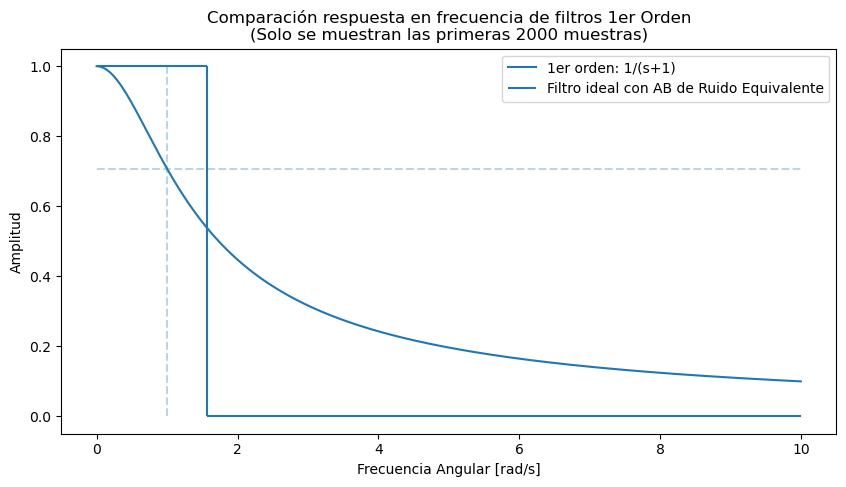

In [21]:
# Grafico ancho de banda equivalente para comparar ambas respuestas.
# Primero grafico función transferencia de 1er orden

fig = plt.gcf()
fig.set_size_inches(10, 5)

plt.title(
  "Comparación respuesta en frecuencia de filtros 1er Orden\n"\
  "(Solo se muestran las primeras 2000 muestras)"
)

# Solo tomo las primeras 2000 muestras (valor arbitrario) para poder observar
# correctamente las curvas. Si tomo todas las muestras veré las gráficas sin mucho
# detalle debido a la cantidad de muestras que presenta el vector
plt.plot(
  eje_de_frecuencia_vector[:2000],
  respuesta_frecuencia_1er_orden_module[:2000]
)

# Construyo de forma manual la curva del filtro con un pendiente vertical
plt.vlines(
    x=ancho_de_banda_de_ruido_equivalente_1er_orden,
    ymin=min_module_1er_orden,
    ymax=max_module_1er_orden,
    alpha=1,
    linestyles='-'
)

# y sus líneas rectas, tanto en la banda de paso como en la banda de rechazo

# Banda de paso
plt.hlines(
    y=1, xmin=min_frec, xmax=ancho_de_banda_de_ruido_equivalente_1er_orden,
    alpha=1, linestyles='-'
)

# Banda de rechazo
plt.hlines(
    y=0, xmin=ancho_de_banda_de_ruido_equivalente_1er_orden, xmax=10,
    alpha=1, linestyles='-'
)

# Grafico recta en frecuencia de corte para evaluar punto de -3 dB de potencia
plt.vlines(
    x=frecuencia_de_corte,
    ymin=min_module_1er_orden,
    ymax=max_module_1er_orden,
    alpha=0.3,
    linestyles='--'
)

# Grafico recta en amplitud teórica del punto de -3 dB de potencia

# Complete con el valor teórico de tensión para el punto de -3 dB de potencia
plt.hlines(y=1/np.sqrt(2), xmin=min_frec, xmax=10, alpha=0.3, linestyles='--')

plt.legend(["1er orden: 1/(s+1)", "Filtro ideal con AB de Ruido Equivalente"])
plt.xlabel("Frecuencia Angular [rad/s]")
plt.ylabel("Amplitud")
plt.show()

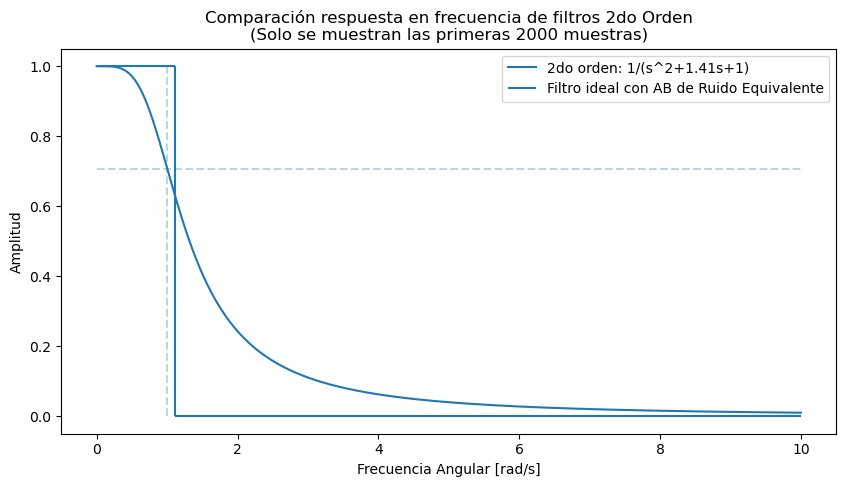

In [22]:
# Grafico ancho de banda equivalente para comparar ambas respuestas.
# Primero grafico función transferencia de 2do orden
fig = plt.gcf()
fig.set_size_inches(10, 5)

plt.title(
    "Comparación respuesta en frecuencia de filtros 2do Orden\n"\
    "(Solo se muestran las primeras 2000 muestras)"
)

# Solo tomo las primeras 2000 muestras (valor arbitrario) para poder observar
# correctamente las curvas. Si tomo todas las muestras veré las gráficas sin mucho
# detalle debido a la cantidad de muestras que presenta el vector
plt.plot(
    eje_de_frecuencia_vector[:2000],
    respuesta_frecuencia_2do_orden_module[:2000]
)

# Construyo de forma manual la curva del filtro con un pendiente vertical
plt.vlines(
    x=ancho_de_banda_de_ruido_equivalente_2do_orden,
    ymin=min_module_2do_orden,
    ymax=max_module_2do_orden,
    alpha=1,
    linestyles='-'
)

# y sus líneas rectas, tanto en la banda de paso como en la banda de rechazo

# Banda de paso
plt.hlines(
    y=1, xmin=min_frec, xmax=ancho_de_banda_de_ruido_equivalente_2do_orden,
    alpha=1, linestyles='-'
)

# Banda de rechazo
plt.hlines(
    y=0, xmin=ancho_de_banda_de_ruido_equivalente_2do_orden, xmax=10,
    alpha=1, linestyles='-'
)

# Grafico recta en frecuencia de corte para evaluar punto de -3 dB de potencia
plt.vlines(
    x=frecuencia_de_corte,
    ymin=min_module_2do_orden,
    ymax=max_module_2do_orden,
    alpha=0.3,
    linestyles='--'
)

# Grafico recta en amplitud teórica del punto de -3 dB de potencia

# Complete con el valor teórico de tensión para el punto de -3 dB de potencia
plt.hlines(y=1/np.sqrt(2), xmin=min_frec, xmax=10, alpha=0.3, linestyles='--')

plt.legend(["2do orden: 1/(s^2+1.41s+1)", "Filtro ideal con AB de Ruido Equivalente"])
plt.xlabel("Frecuencia Angular [rad/s]")
plt.ylabel("Amplitud")
plt.show()

### Link Auxiliar

[Equivalent Noise Bandwidth](https://analog.intgckts.com/equivalent-noise-bandwidth/): Explicación breve y tabla con Ancho de Banda de Ruido Equivalente calculado para algunos filtros

In [23]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.fft import fft, fftfreq, fftshift
from scipy.ndimage.interpolation import shift
from scipy.signal import convolve

C:\Users\Juan Gerez Jimenez\AppData\Local\Temp\ipykernel_34000\1921158325.py:5: DeprecationWarning: Please import `shift` from the `scipy.ndimage` namespace; the `scipy.ndimage.interpolation` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.interpolation import shift


## Ejercicio 2

  Suponga que se tiene un amplificador definido por la siguiente expresión de transferencia:
  
    y(t)=4.x(t)+0,04.x^2(t)-0,05.x^3(t)

> a) Dibuje la curva de transferencia estática, comparándola con la recta ideal

> b) Use la FFT para encontrar el espectro de salida si la señal de entrada es x(t)=3.cos(2.π.20.t)

> c) Para la misma señal, use  la convolución en la frecuencia para encontrar el espectro de salida del amplificador. Muestre primero por separado las componentes debidas al término lineal, cuadrático y cúbico de la curva de transferencia del amplificador. Luego encuentre la suma total de todas las componentes, y verifique que se llega al mismo resultado en en el ítem "b" de este ejercicio.

### Apartado a

In [24]:
# Defino la expresión de transferencia
transferencia_amplificador = lambda x: 4 * x + 0.04 * x**2 - 0.05 * x**3

In [25]:
# Genero vector con valores de tensión para la señal de entrada

# Valores entre 0 y 10 con saltos de 0.01
amplitudes_vector = np.arange(0, 10.01, 0.01)

In [26]:
# Aplico la expresión de transferencia a la señal de entrada

senial_salida_amplificador = transferencia_amplificador(amplitudes_vector)

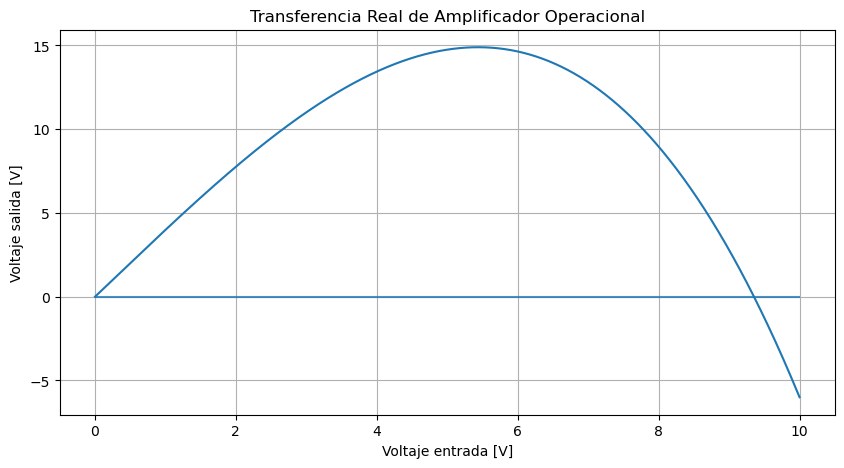

In [27]:
# Grafico la respuesta

fig = plt.gcf()

fig.set_size_inches(10, 5)
plt.title("Transferencia Real de Amplificador Operacional")

plt.plot(amplitudes_vector, senial_salida_amplificador)
plt.hlines(y=0, xmin=0, xmax=10, alpha=0.8)

plt.xlabel("Voltaje entrada [V]")
plt.ylabel("Voltaje salida [V]")
plt.grid()

plt.show()

### Apartado B

In [28]:
# Defino parámetros para construir eje temporal
tiempo_de_muestra = 7
tiempo_de_muestreo = 0.005

eje_temporal_apartado_b = np.arange(start=0, stop=tiempo_de_muestra, step=tiempo_de_muestreo)

In [29]:
# Genero señal de entrada del enunciado

senial_entrada_vector = 3 * np.cos(2 * np.pi * 20 * eje_temporal_apartado_b)

In [30]:
# Aplico función transferencia a señal de entrada

senial_salida = transferencia_amplificador(senial_entrada_vector)

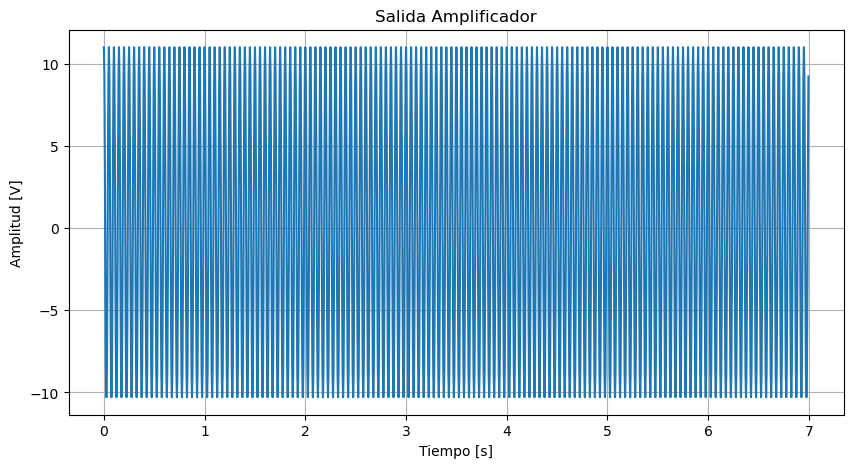

In [31]:
# Grafico señal de salida del amplificador
fig = plt.gcf()

fig.set_size_inches(10, 5)
plt.title("Salida Amplificador")

plt.plot(eje_temporal_apartado_b, senial_salida)

plt.ylabel("Amplitud [V]")
plt.xlabel("Tiempo [s]")

plt.grid()
plt.show()

In [32]:
# Calculo FFT para la señal de salida a fin de observar el espectro de esta

senial_salida_fft = fft(senial_salida)

# Calculo muestras de frecuencia de la FFT calculada
senial_salida_ftt_freqs = fftfreq(senial_salida_fft.size, tiempo_de_muestreo)

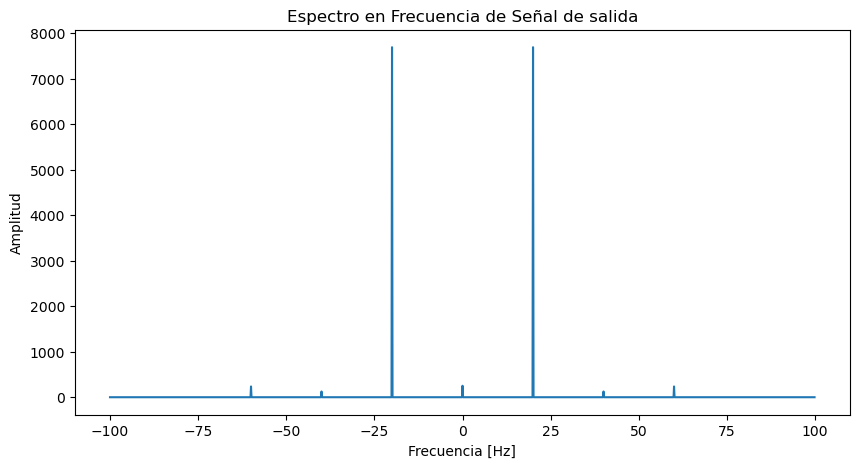

In [45]:
# Grafico espectro en frecuencia de la señal de salida

fig = plt.gcf()

fig.set_size_inches(10, 5)
plt.title("Espectro en Frecuencia de Señal de salida")

plt.plot(fftshift(senial_salida_ftt_freqs), np.abs(fftshift(senial_salida_fft)))

plt.ylabel("Amplitud")
plt.xlabel("Frecuencia [Hz]")

plt.show()

### Apartado c

Debido al Teorema de Convolución, que estable que,

Dada dos funciones tal que:

$g_{1}(t) ⇔ G_{1}(f)$ y $g_{2}(t) ⇔ G_{2}(f)$

se puede establecer que

**Convolución en el tiempo es igual que multiplicación en la frecuencia**

$g_{1}(t) * g_{2}(t)  ⇔ G_{1}(f) G_{2}(f)$

**Convolución en la frecuencia es igual que multiplicación en el tiempo**

$g_{1}(t) g_{2}(t)  ⇔ G_{1}(f) * G_{2}(f)$

Referencia: Lathi B. P., et al (2010). *Modern Digital and Analog Communication systems*. 4th Edition, pp. 87. Oxford University Press.

A partir del teorema anterior, definiendo la expresión de transferencia como h(t), tal que:

$ h(t) = 4 x(t) + 0.04 x(t)^2  - 0.05 x(t)^3$

Podemos establecer que,

$F[h(t)] = 4 X(f) + 0.04 [X(f) * X(f)] - 0.05 [X(f) * X(f) * X(f)]$



---


A continuación se calculará la convolución de dos señales haciendo uso del método ya definido en la librería *scipy*.

Notar los argumentos pasados:

> `mode = "same"`

El vector de convolución resultante tendrá la misma longitud que el vector definido como primer argumento de la función, estando centrado respecto a la convolución total.

*Esto permite respetar la misma cantidad de muestras que la señal original, lo cual simplifica la interpretación de la FFT resultante.*

> `method = "direct"`

La convolución se calcula mediante la suma de término como establece su definición. Se diferencia del método que emplea la FFT para el cálculo de la misma.

In [35]:
# Calculo X(f)
fft_entrada = fftshift(fft(senial_entrada_vector))

# Calculo convolución de X(f) * X(f) usando método de scipy
convolucion_2 = convolve(fft_entrada, fft_entrada, mode="same", method="direct")

# Escalo la convolución calculada debido a la cantidad de muestras contempladas
# en la DFFT
convolucion_2 = convolucion_2/convolucion_2.size

# Centro el vector debido a algoritmo utilizado por librería
# Elimino primer elemento
convolucion_2 = convolucion_2[1:]
# Agrego elemento = 0 al final
convolucion_2 = np.insert(convolucion_2, convolucion_2.size, 0)

# Calculo convolución de X(f) * X(f) * X(f) usando método de scipy y
# aprovechando resultado de convolve_2
convolucion_3 = convolve(convolucion_2, fft_entrada, mode="same", method="direct")

# Escalo la convolución calculada debido a la cantidad de muestras contempladas
# en la DFFT
convolucion_3 = convolucion_3/convolucion_3.size

# Centro el vector debido a algoritmo utilizado por librería
# Elimino primer elemento
convolucion_3 = convolucion_3[1:]
# Agrego elemento = 0 al final
convolucion_3 = np.insert(convolucion_3, convolucion_3.size, 0)

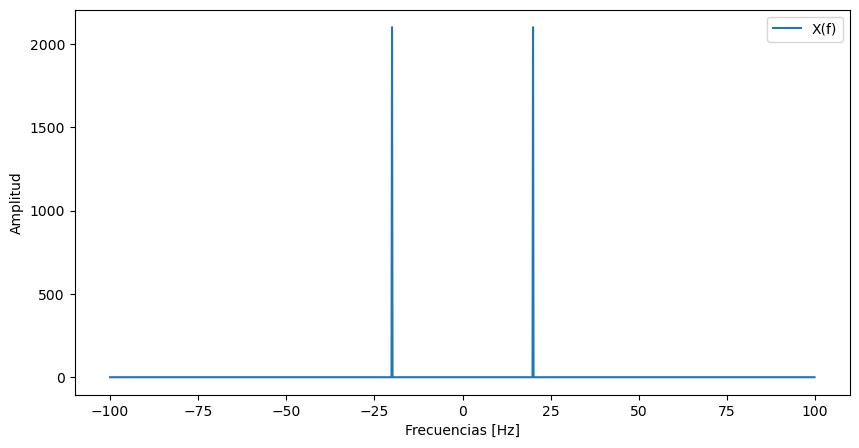

In [36]:
# Grafico X(f)
fig = plt.gcf()
fig.set_size_inches(10, 5)

plt.plot(fftshift(senial_salida_ftt_freqs), abs(fft_entrada))

plt.xlabel("Frecuencias [Hz]")
plt.ylabel("Amplitud")
plt.legend(["X(f)"])

plt.show()

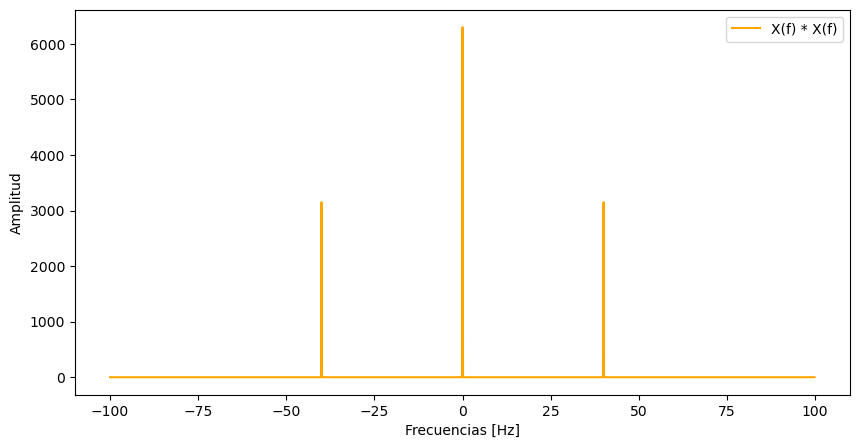

In [37]:
# Grafico X(f) * X(f)
fig = plt.gcf()
fig.set_size_inches(10, 5)

plt.plot(fftshift(senial_salida_ftt_freqs), abs(convolucion_2), "orange")

plt.xlabel("Frecuencias [Hz]")
plt.ylabel("Amplitud")
plt.legend(["X(f) * X(f)"])

plt.show()

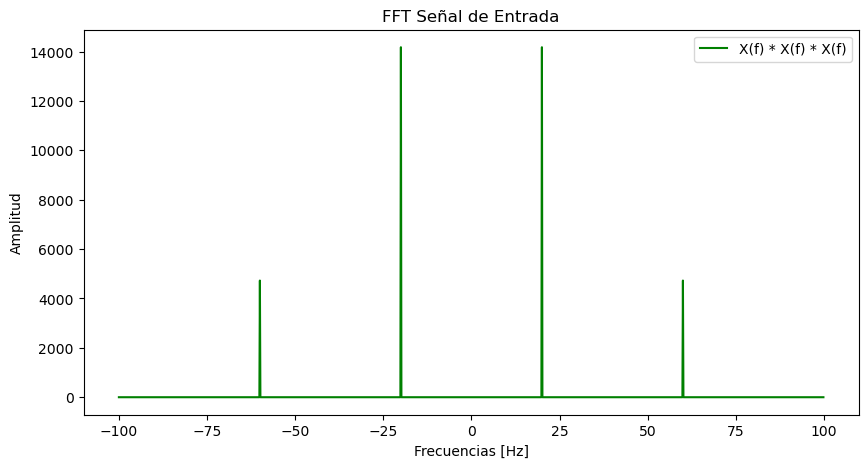

In [38]:
# Grafico X(f) * X(f) * X(f)
fig = plt.gcf()
fig.set_size_inches(10, 5)

plt.title("FFT Señal de Entrada")

plt.plot(fftshift(senial_salida_ftt_freqs), abs(convolucion_3), "green")

plt.xlabel("Frecuencias [Hz]")
plt.ylabel("Amplitud")
plt.legend(["X(f) * X(f) * X(f)"])

plt.show()

In [39]:
# Afecto cada resultado de la convolución por la amplitud de la expresión de
# transferencia
salida_lineal = 4 * fft_entrada
salida_cuadratica = 0.04 * convolucion_2
salida_cubica = 0.04 * convolucion_3

In [40]:
# Calculo espectro total de la señal de salida
salida_total = salida_lineal + salida_cuadratica + salida_cubica

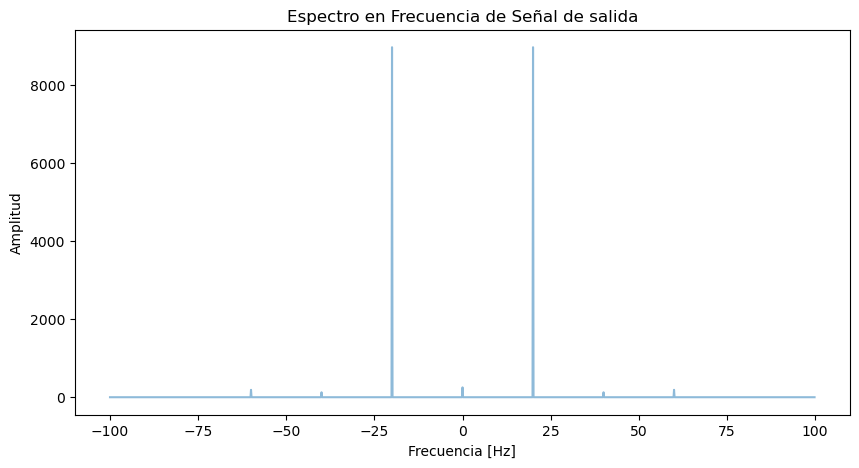

In [41]:
fig = plt.gcf()

fig.set_size_inches(10, 5)
plt.title("Espectro en Frecuencia de Señal de salida")

plt.plot(fftshift(senial_salida_ftt_freqs), abs(salida_total), alpha=0.5)

plt.ylabel("Amplitud")
plt.xlabel("Frecuencia [Hz]")

plt.show()
